In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [139]:
names(AA_Sex_1)

[1] "ID"                       "GROUP"                   
  [3] "MATERNALAGE"              "SEXO"                    
  [5] "INFANTDOB"                "MATBMI1COLL"             
  [7] "MATBMI215d"               "MATBMI32mos"             
  [9] "MATBMI44mos"              "BABYWeigth1g"            
 [11] "BABYWeigth2g"             "BABYWeigth3g"            
 [13] "BABYWeigth4g"             "HeadCircumcm1"           
 [15] "HCcm2"                    "HCcm3"                   
 [17] "HCcm4"                    "MATHeight1m"             
 [19] "MATHeight2m"              "MATHeight3m"             
 [21] "MATHeight4m"              "MATWeight1kg"            
 [23] "MATWeight2kg"             "MATWeight3kg"            
 [25] "MATWeight4kg"             "A.TOTALCALORIESKcal"     
 [27] "B.TOTALCALORIESKcal"      "A.PROTEINg"              
 [29] "B.PROTEINg"               "A.CHOg"                  
 [31] "B.CHOg"                   "A.LIPIDSg"               
 [33] "B.LIPIDSg"                "A.GLUCOSEmgdL"           
 [35] "B.GLUCOSEmgdL"            "A.CHOLESTEROLmgdL"       
 [37] "B.CHOLESTEROLmgdL"        "A.TRIGLYCERIDSmgdL"      
 [39] "B.TRIGLYCERIDmgdL"        "A.HDLmgdL"               
 [41] "B.HDLmgdL"                "A.LDLmgdL"               
 [43] "B.LDLmgdL"                "A.PROTEINSgdL"           
 [45] "B.PROTEINSgdL"            "A.ALBUMINgdL"            
 [47] "B.ALBUMINgdL"             "edadr"                   
 [49] "Grupos"                   "CALOSTRUMtotalAA"        
 [51] "TRANSITIONtotalAA"        "MATURE2mtotalAA"         
 [53] "MATURE4mtotalAA"          "CALOSTRUMessentialAA"    
 [55] "TRANSITIONessentialAA"    "MATURE2messentialAA"     
 [57] "MATURE4messentialAA"      "ARGCalostrum"            
 [59] "ARGTransition"            "ARGMature2m"             
 [61] "ARGMature4m"              "HISCalostrum"            
 [63] "HISTransition"            "HISMature2m"             
 [65] "HISMature4m"              "ILECalostrum"            
 [67] "ILETransition"            "ILEMature2m"             
 [69] "ILEMature4m"              "LEUCalostrum"            
 [71] "LEUTransition"            "LEUMature2m"             
 [73] "LEUMature4m"              "LYSCalostrum"            
 [75] "LYSTransition"            "LYSMature2m"             
 [77] "LYSMature4m"              "METCalostrum"            
 [79] "METTransition"            "METMature2m"             
 [81] "METMature4m"              "PHECalostrum"            
 [83] "PHETransition"            "PHEMature2m"             
 [85] "PHEMature4m"              "THRCalostrum"            
 [87] "THRTransition"            "THRMature2m"             
 [89] "THRMature4m"              "TRPCalostrum"            
 [91] "TRPTransition"            "TRPMature2m"             
 [93] "TRPMature4m"              "VALCalostrum"            
 [95] "VALTransition"            "VALMature2m"             
 [97] "VALMature4m"              "CALOSTRUMnonessentialAA" 
 [99] "TRANSITIONnonessentialAA" "MATURE2mnonessentialAA"  
[101] "MATURE4mnonessentialAA"   "ASPCalostrum"            
[103] "ASPTransition"            "ASPMature2m"             
[105] "ASPMature4m"              "ALACalostrum"            
[107] "ALATransition"            "ALAMature2m"             
[109] "ALAMature4m"              "ASNCalostrum"            
[111] "ASNTransition"            "ASNMature2m"             
[113] "ASNMature4m"              "CYSCalostrum"            
[115] "CYSTransition"            "CYSMature2m"             
[117] "CYSMature4m"              "GLYCalostrum"            
[119] "GLYTransition"            "GLYMature2m"             
[121] "GLYMature4m"              "GLUCalostrum"            
[123] "GLUTransition"            "GLUMature2m"             
[125] "GLUMature4m"              "GLNCalostrum"            
[127] "GLNTransition"            "GLNMature2m"             
[129] "GLNMature4m"              "PROCalostrum"            
[131] "PROTransition"            "PROMature2m"             
[133] "PROMature4m"              "SERCalos

In [142]:
str(AA_Sex_1)

Classes 'tbl_df', 'tbl' and 'data.frame':	65 obs. of  171 variables:
 $ ID                      : atomic  1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "format.spss")= chr "F8.0"
  ..- attr(*, "display_width")= int 12
 $ GROUP                   :Class 'labelled'  atomic [1:65] 0 0 0 0 0 0 0 0 0 0 ...
  .. ..- attr(*, "format.spss")= chr "F8.0"
  .. ..- attr(*, "display_width")= int 12
  .. ..- attr(*, "labels")= Named num [1:2] 0 1
  .. .. ..- attr(*, "names")= chr [1:2] "ADOLESCENTE" "ADULTA"
 $ MATERNALAGE             : atomic  17 16 17 16 16 16 16 16 17 18 ...
  ..- attr(*, "label")= chr "MATERNAL AGE"
  ..- attr(*, "format.spss")= chr "F8.0"
  ..- attr(*, "display_width")= int 12
 $ SEXO                    :Class 'labelled'  atomic [1:65] 1 2 2 2 NA 2 2 2 1 2 ...
  .. ..- attr(*, "format.spss")= chr "F8.0"
  .. ..- attr(*, "display_width")= int 12
  .. ..- attr(*, "labels")= Named num [1:2] 1 2
  .. .. ..- attr(*, "names")= chr [1:2] "Femenino" "Masculino"
 $ INFANTDOB               : Dat

In [4]:
names(AA_Sex_1)[58]
names(AA_Sex_1)[97]

names(AA_Sex_1)[102]
names(AA_Sex_1)[141]

[1] "ARGCalostrum"

[1] "VALMature4m"

[1] "ASPCalostrum"

[1] "TYRMature4m"

In [5]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
[13] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[17] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[21] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[25] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[29] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[33] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[37] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[41] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [6]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,ARGCalostrum,1
2,teen,16,boy,ARGCalostrum,1
3,teen,17,boy,ARGCalostrum,1
4,teen,16,boy,ARGCalostrum,1
5,teen,16,NA,ARGCalostrum,2
6,teen,16,boy,ARGCalostrum,2


In [7]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "4", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


In [8]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "4", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ASPCalostrum,3,1,ASP
2,teen,16,boy,ASPCalostrum,1,1,ASP
3,teen,17,boy,ASPCalostrum,4,1,ASP
4,teen,16,boy,ASPCalostrum,1,1,ASP
5,teen,16,NA,ASPCalostrum,1,1,ASP
6,teen,16,boy,ASPCalostrum,1,1,ASP


In [9]:
AA_E_Long %>% filter(id == 4) %>% head()

id,group,age,sex,weekNames,level,week,AA
4,teen,16,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGTransition,NA,2,ARG
4,teen,16,boy,ARGMature2m,NA,4,ARG
4,teen,16,boy,ARGMature4m,NA,16,ARG
4,teen,16,boy,HISCalostrum,1,1,HIS
4,teen,16,boy,HISTransition,NA,2,HIS


Warning message:
"Removed 711 rows containing non-finite values (stat_density)."

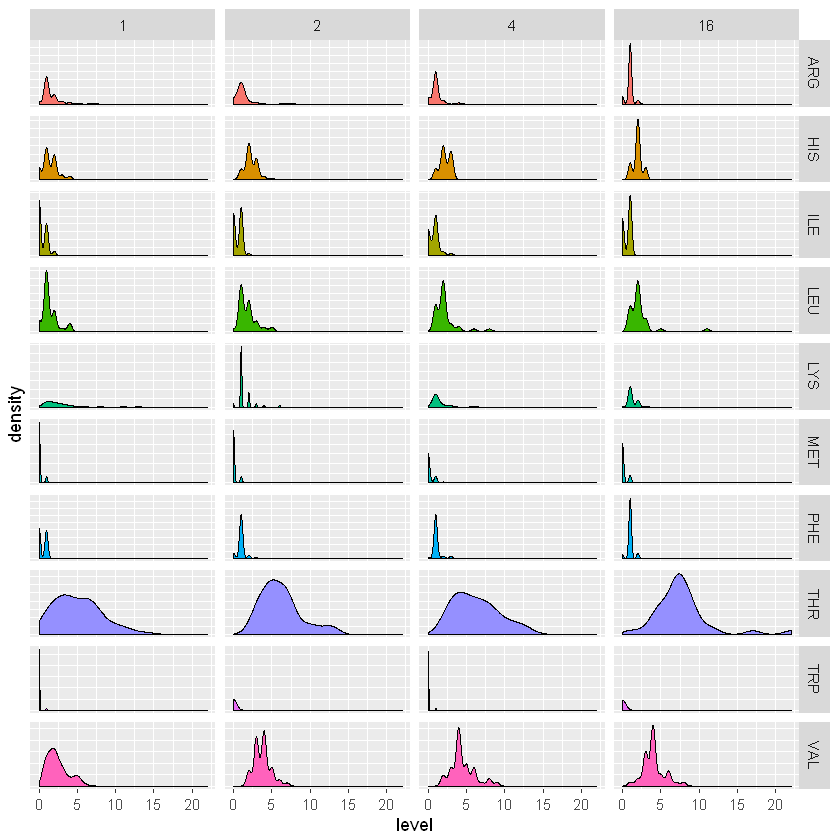

In [10]:
ggplot(AA_E_Long, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) +
    facet_grid(AA ~ week, scales = "free_y") +
    theme(
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank()
    )

Warning message:
"Removed 710 rows containing non-finite values (stat_density)."

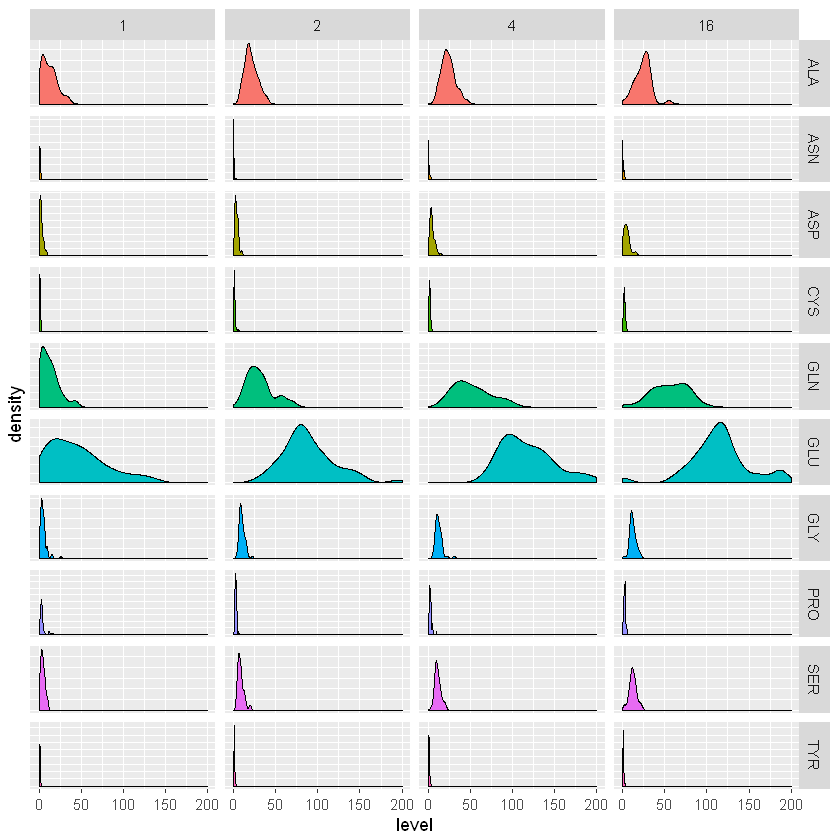

In [11]:
ggplot(AA_NE_Long, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) + 
    facet_grid(AA ~ week, scales = "free_y") +
    theme(
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank()
    ) 

In [12]:
AA_E_sum <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_E_sum

AA,1,2,4,16
ARG,1.54 ± 1.15,1.12 ± 1.06,1 ± 0.69,0.95 ± 0.4
HIS,1.43 ± 0.98,2.29 ± 0.85,2.23 ± 0.71,1.95 ± 0.57
ILE,0.45 ± 0.59,0.56 ± 0.54,0.74 ± 0.68,0.62 ± 0.49
LEU,1.38 ± 1,1.79 ± 1.09,2.15 ± 1.39,2.19 ± 1.7
LYS,2.55 ± 2.21,1.38 ± 0.98,1.36 ± 0.99,1.27 ± 0.56
MET,0.09 ± 0.29,0.1 ± 0.31,0.23 ± 0.48,0.16 ± 0.37
PHE,0.48 ± 0.5,1 ± 0.51,1.13 ± 0.52,1.03 ± 0.37
THR,5.08 ± 3.05,6.15 ± 2.63,6.31 ± 2.9,7.68 ± 3.64
TRP,0.03 ± 0.17,0 ± 0,0.03 ± 0.16,0 ± 0
VAL,2.38 ± 1.34,3.73 ± 1.09,4.54 ± 1.6,4.05 ± 1.39


In [13]:
AA_NE_sum <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_NE_sum

AA,1,2,4,16
ALA,12.12 ± 9.02,20.98 ± 7.65,24 ± 8.15,24.11 ± 9.67
ASN,0.75 ± 0.66,0.21 ± 0.54,0.62 ± 1.02,0.54 ± 0.87
ASP,2.66 ± 2.15,3.69 ± 1.98,4.92 ± 3.06,5.03 ± 3.7
CYS,0.77 ± 0.7,1.27 ± 1.01,1.85 ± 0.87,2.3 ± 1.08
GLN,12.6 ± 10.68,31.42 ± 15.85,51.95 ± 21.76,56.05 ± 21.17
GLU,44.92 ± 33.93,89.46 ± 31.81,118.28 ± 31.19,114.84 ± 35.95
GLY,5.03 ± 4.07,10.12 ± 3.38,12.74 ± 4.46,12.24 ± 3.85
PRO,3.6 ± 2.82,2.81 ± 0.91,2.77 ± 1.68,2.54 ± 1.04
SER,4.57 ± 2.68,8.54 ± 3.62,11.62 ± 3.7,12.32 ± 4.44
TYR,0.66 ± 0.64,1.04 ± 0.58,1.13 ± 0.66,1 ± 0.58


## Sex and Free AA levels:

http://felixhaass.de/dataviz_ggplot2/session4.html


In [15]:
library(broom.mixed)
library(dotwhisker)

In [16]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [17]:
meSexWeek <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [18]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [55]:
me_E <- list()
tidy_E <- list()

me_NE <- list()
tidy_NE <- list()

for(i in 1:nAA_E){
    
    me_E[[i]] <- meSexWeek(AA_E_Nested$data[[i]])
    tidy_E[[i]] <- tidy(me_E[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
    me_NE[[i]] <- meSexWeek(AA_NE_Nested$data[[i]])
    tidy_NE[[i]] <- tidy(me_NE[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [53]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E, tidy = tidy_E)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE, tidy = tidy_NE)

In [57]:
me_E[[1]]
AA_E_Nested$tidy[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + (1 | id)
   Data: df
REML criterion at convergence: 469.0712
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.3587  
 Residual             0.7847  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  
    1.22548      0.14074     -0.02248  

effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.22547932,0.12673091,9.6699323,ARG
fixed,sexboy,0.14073970,0.15293027,0.9202867,ARG
fixed,week,-0.02247854,0.01037076,-2.1674926,ARG


In [125]:
sexCoef_E <- bind_rows(tidy_E) %>% filter(grepl("sexboy", term))
sexCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("sexboy", term))

sexCoef_E
sexCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.140739699,0.15293027,0.9202867,ARG
fixed,sexboy,0.179637148,0.14826963,1.2115572,HIS
fixed,sexboy,0.088613218,0.10500084,0.8439287,ILE
fixed,sexboy,0.040495036,0.19819822,0.2043158,LEU
fixed,sexboy,0.174878897,0.21943104,0.7969652,LYS
fixed,sexboy,0.061657018,0.05528562,1.1152452,MET
fixed,sexboy,0.117331807,0.08059965,1.4557359,PHE
fixed,sexboy,-0.687749892,0.61301954,-1.1219053,THR
fixed,sexboy,-0.003569898,0.01565889,-0.2279790,TRP
fixed,sexboy,0.260670679,0.25206341,1.0341472,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.55352849,0.4824506,1.1473268,ASP
fixed,sexboy,1.64897865,1.6709972,0.9868231,ALA
fixed,sexboy,-0.08409476,0.1258007,-0.6684763,ASN
fixed,sexboy,0.36643929,0.1655625,2.2132985,CYS
fixed,sexboy,1.83468673,0.8053847,2.2780253,GLY
fixed,sexboy,14.45211622,6.6578580,2.1706856,GLU
fixed,sexboy,3.21092145,3.5211046,0.9119074,GLN
fixed,sexboy,0.38254081,0.3443933,1.1107673,PRO
fixed,sexboy,1.25092729,0.7143037,1.7512541,SER
fixed,sexboy,0.23736429,0.1101457,2.1550025,TYR


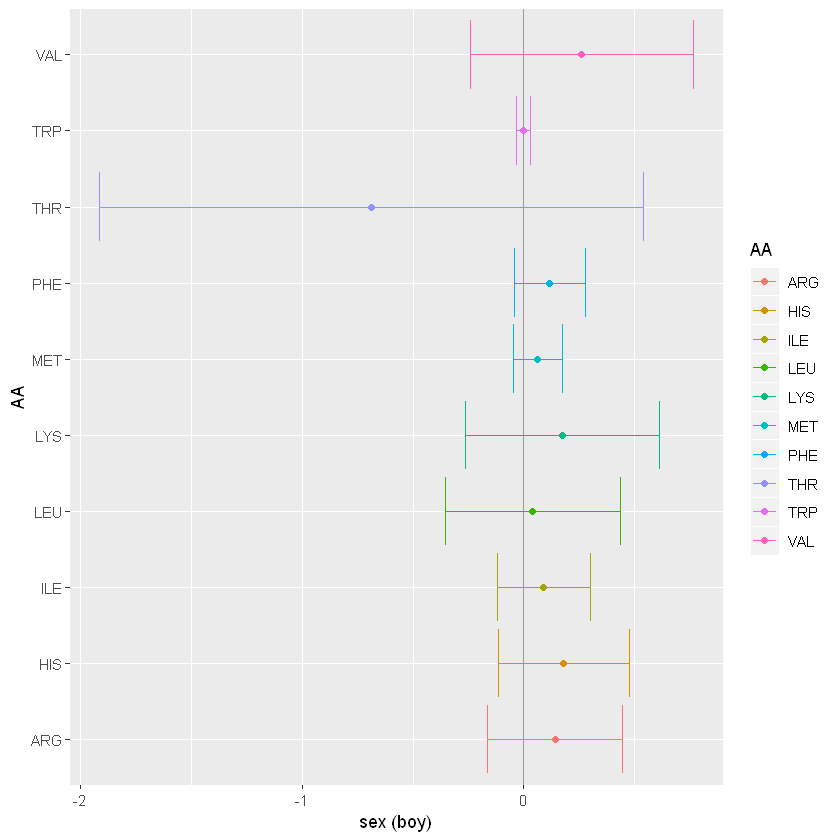

In [133]:
ggplot(sexCoef_E, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_errorbar( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    coord_flip() + ylab('sex (boy)')

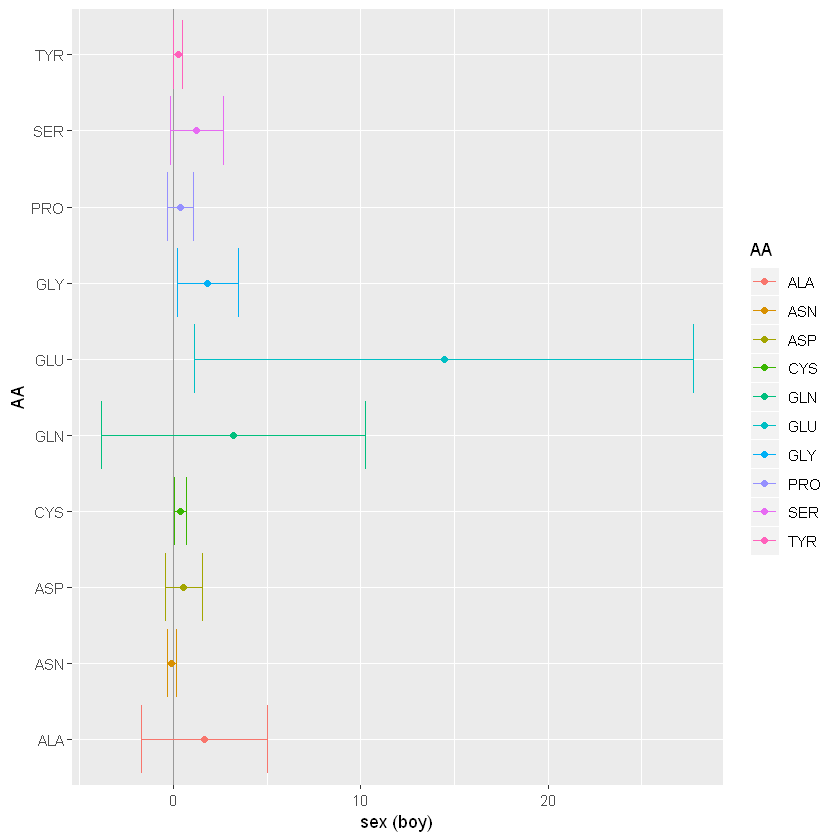

In [134]:
ggplot(sexCoef_NE, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_errorbar( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    coord_flip() + ylab('sex (boy)')

In [145]:
AA_NE_Long %>% group_by(id) %>% summarise(TAA = mean(level, na.rm = T))

id,TAA
1,15.82500
2,19.05000
3,17.55000
4,6.30000
5,4.20000
6,15.07500
7,19.20000
8,26.90000
9,10.10000
10,18.90000
